In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Phase 1: Data Preprocessing
# Data Import and Cleaning:
df = pd.read_csv('Food_Delivery_Time_Prediction.csv')
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [3]:
df.columns

Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount'],
      dtype='object')

In [4]:
df.isnull().sum().sum()

0

In [5]:
# Feature Engineering:
# Calculate the geographic distance between the customer and restaurant using latitude and longitude (Haversine formula).
import ast
df['Customer_Location'] = df['Customer_Location'].apply(ast.literal_eval)
df['Restaurant_Location'] = df['Restaurant_Location'].apply(ast.literal_eval)

def havershine_dist(a,b,c,d):
    a,b,c,d = map(np.radians,[a,b,c,d])
    dlat = a-c
    dlon = b-d
    x = np.sin(dlat/2)**2+ np.cos(a)*np.cos(c)*np.sin(dlon/2)**2
    y = 2*np.arcsin(np.sqrt(x))
    R = 6371
    return R*y

df['GeoDistance'] = df.apply(lambda row: havershine_dist(row['Customer_Location'][0], row['Customer_Location'][1], row['Restaurant_Location'][0], row['Restaurant_Location'][1]), axis =1)

In [6]:
df[['Customer_Location','Restaurant_Location','GeoDistance','Distance']]

,Customer_Location,Restaurant_Location,GeoDistance,Distance
0,"(17.030479, 79.743077)","(12.358515, 85.100083)",775.651198,1.57
1,"(15.398319, 86.639122)","(14.174874, 77.025606)",1042.385597,21.32
2,"(15.687342, 83.888808)","(19.594748, 82.048482)",476.220706,6.95
3,"(20.415599, 78.046984)","(16.915906, 78.278698)",389.912629,13.79
4,"(14.786904, 78.706532)","(15.206038, 86.203182)",806.505886,6.72
...,...,...,...,...
195,"(17.910045, 81.56199)","(18.098924, 87.896124)",670.130652,23.82
196,"(21.66459, 82.226635)","(16.892341, 80.554716)",558.891202,6.09
197,"(14.575401, 82.55641)","(13.625369, 82.418092)",106.686689,20.61
198,"(12.094497, 82.893369)","(19.135509, 86.659978)",880.580093,24.06


Delivery_Status
1    151
0     49
Name: count, dtype: int64


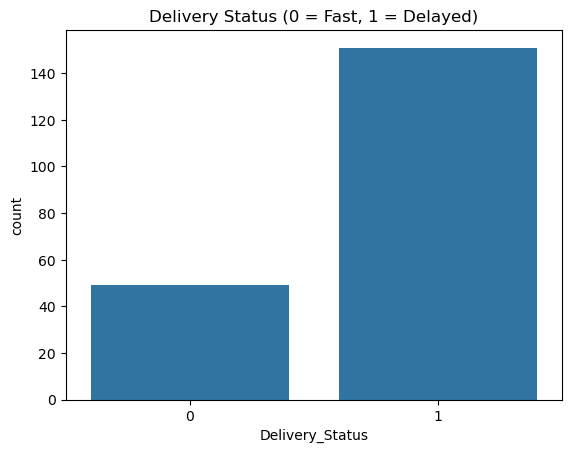

In [7]:
# Create binary categories based on delivery time (e.g., 1 for delayed and 0 for fast).

df['Delivery_Status'] = df['Delivery_Time'].apply(lambda x: 1 if x > 45 else 0)
print(df['Delivery_Status'].value_counts())

sns.countplot(x='Delivery_Status', data=df)
plt.title('Delivery Status (0 = Fast, 1 = Delayed)')
plt.show()


In [8]:
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
cols_to_encode = ['Weather_Conditions', 'Traffic_Conditions', 
                  'Delivery_Person_Experience', 'Order_Priority', 
                  'Order_Time']

# Apply LabelEncoder to each column
le = LabelEncoder()
for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])


In [9]:
# Phase 2: Classification using Naive Bayes, K-Nearest Neighbors, and Decision Tree
# Naive Bayes Classifier:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
x=df[['Weather_Conditions', 'Traffic_Conditions', 'Order_Priority', 'Order_Time']]
y=df['Delivery_Status']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5)
gnb = GaussianNB()
gnb.fit(x_train, y_train)
ynb_pred = gnb.predict(x_test)

print(f'The accuracy score is {accuracy_score(y_test,ynb_pred)}')
print(f'Classification Report as follows: \n{classification_report(y_test,ynb_pred)}')
print(f'Confusion Matrix : \n{confusion_matrix(y_test,ynb_pred)}')

The accuracy score is 0.81
Classification Report as follows: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.81      1.00      0.90        81

    accuracy                           0.81       100
   macro avg       0.41      0.50      0.45       100
weighted avg       0.66      0.81      0.72       100

Confusion Matrix : 
[[ 0 19]
 [ 0 81]]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

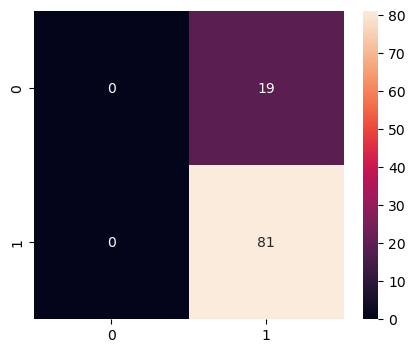

In [10]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,ynb_pred),annot= True)


Accuracy with k=1: 64.00%
Classification Report for k=1:
              precision    recall  f1-score   support

           0       0.27      0.36      0.31        11
           1       0.80      0.72      0.76        39

    accuracy                           0.64        50
   macro avg       0.53      0.54      0.53        50
weighted avg       0.68      0.64      0.66        50


Accuracy with k=21: 74.00%
Classification Report for k=21:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.77      0.95      0.85        39

    accuracy                           0.74        50
   macro avg       0.39      0.47      0.43        50
weighted avg       0.60      0.74      0.66        50



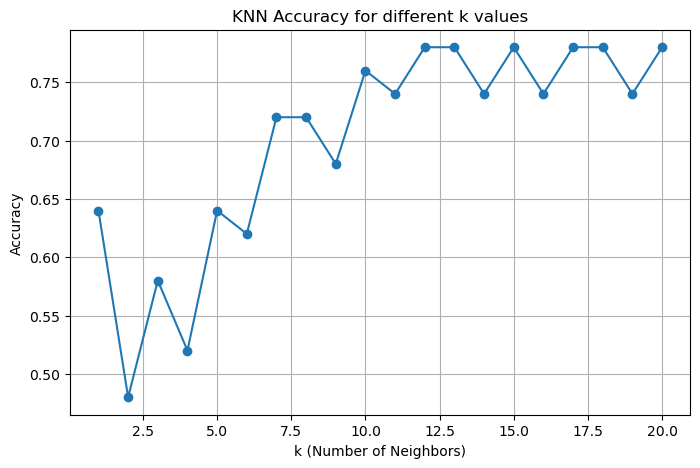

In [11]:
# K-Nearest Neighbors (KNN):
from sklearn.neighbors import KNeighborsClassifier
for k in [1, 21]:
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print(f'\nAccuracy with k={k}: {accuracy_score(y_test, y_pred) * 100:.2f}%')
    print(f'Classification Report for k={k}:\n{classification_report(y_test, y_pred)}')

# Optional: Accuracy vs k plot
k_range = range(1, 21)
accuracies = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    acc = accuracy_score(y_test, model.predict(x_test))
    accuracies.append(acc)

plt.figure(figsize=(8, 5))
plt.plot(k_range, accuracies, marker='o')
plt.title("KNN Accuracy for different k values")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [12]:
# Decision Tree:

from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
x_train2, x_validation, y_train2, y_validation = train_test_split(x_train, y_train,test_size=0.2)
# for entropy
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtree.fit(x_train2,y_train2)
prediction = dtree.predict(x_validation)
prediction2 = dtree.predict(x_test)

print(f"The Validation accuracy :{accuracy_score(y_validation, prediction)}")
print(f"The Test accuracy :{accuracy_score(y_test, prediction2)}")


The Validation accuracy :0.6875
The Test accuracy :0.65


In [19]:
# for gini
dtree2 = DecisionTreeClassifier(criterion='gini', max_depth=3)
dtree2.fit(x_train2,y_train2)
prediction = dtree2.predict(x_validation)
prediction2 = dtree2.predict(x_test)

print(f"The Validation accuracy :{accuracy_score(y_validation, prediction)}")
print(f"The Test accuracy :{accuracy_score(y_test, prediction2)}")


The Validation accuracy :0.6875
The Test accuracy :0.65


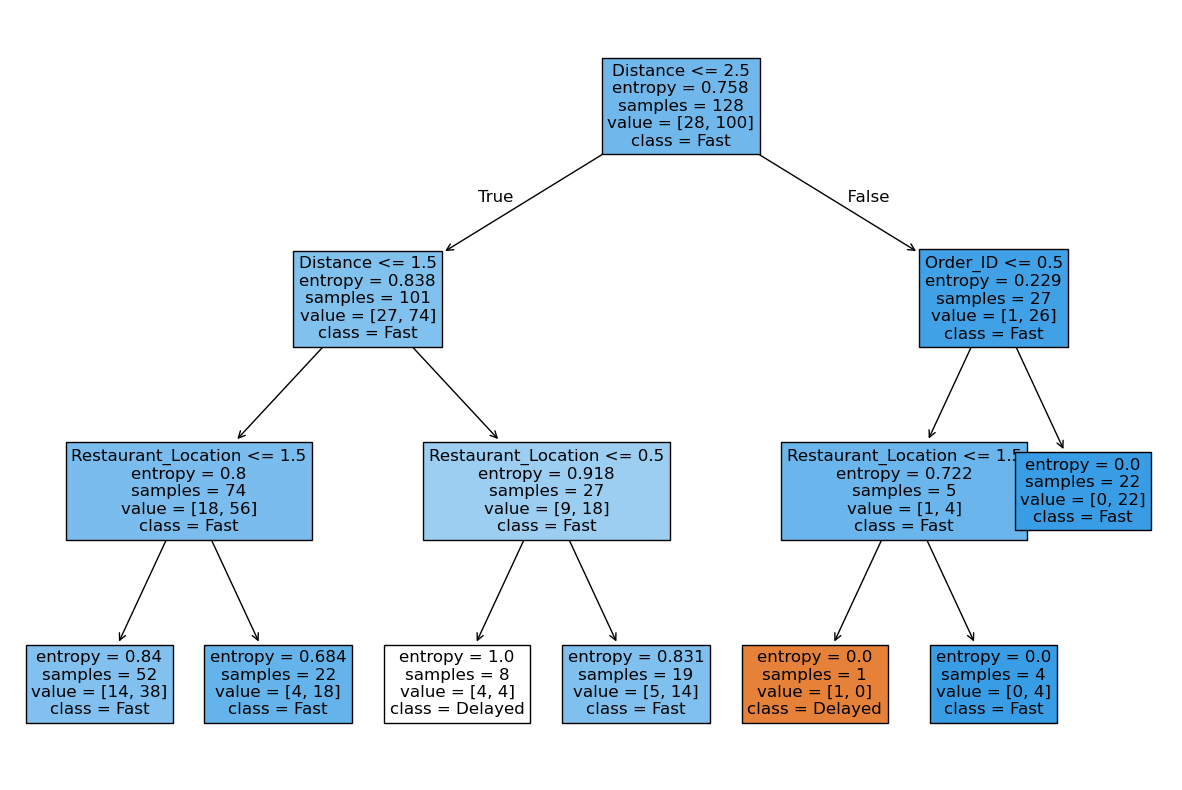

In [24]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
a = plot_tree(dtree, feature_names=df.columns, fontsize=12, filled=True, class_names=['Delayed','Fast'])
plt.show()

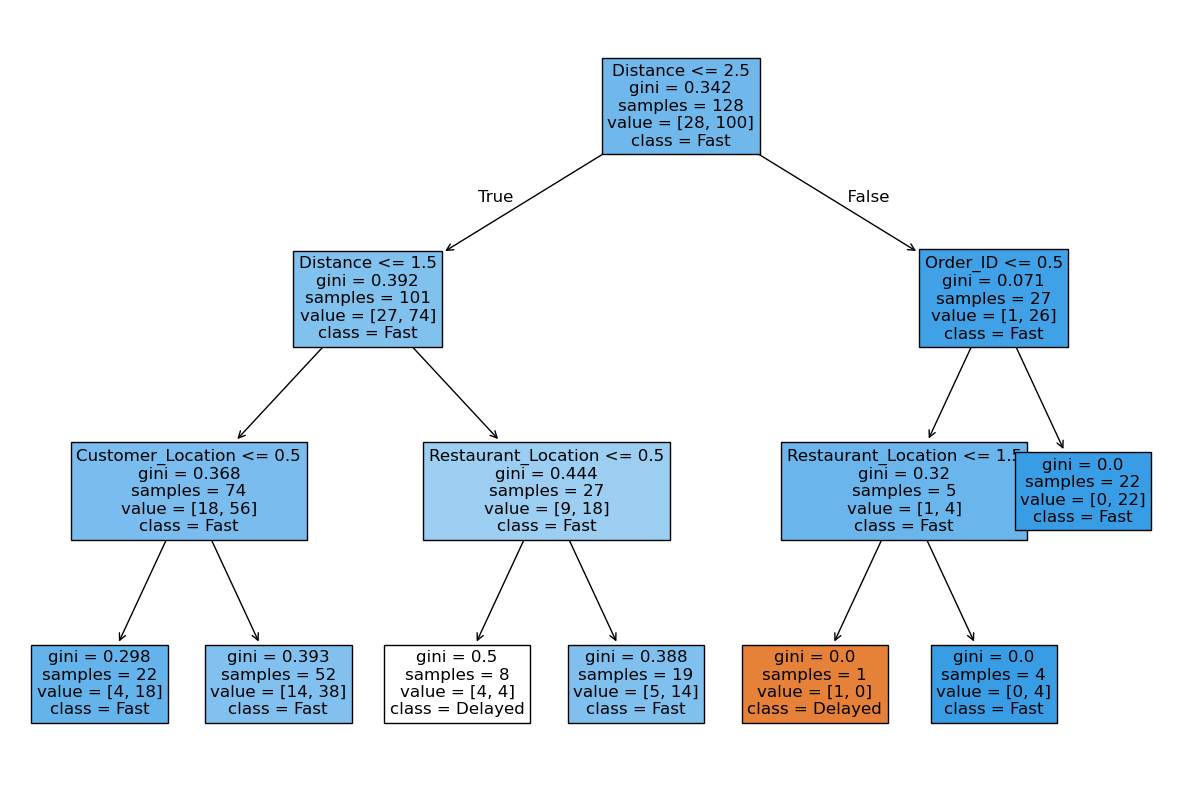

In [26]:
plt.figure(figsize=(15,10))
b = plot_tree(dtree2, feature_names=df.columns, fontsize=12, filled=True, class_names=['Delayed','Fast'])
plt.show()

In [31]:
df


,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,GeoDistance,Delivery_Status
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,2,3,2,0,Car,4.1,3.0,26.22,1321.10,81.54,775.651198,0
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,0,2,7,1,3,Car,4.5,4.2,62.61,152.21,29.02,1042.385597,1
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,2,8,0,3,Bike,3.3,3.4,48.43,1644.38,64.17,476.220706,1
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,0,1,1,2,1,Bike,3.2,3.7,111.63,541.25,79.23,389.912629,1
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,0,5,1,3,Bike,3.5,2.8,32.38,619.81,2.34,806.505886,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,0,0,7,2,3,Bike,4.7,4.0,50.39,1432.26,66.34,670.130652,1
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,2,2,7,1,3,Bicycle,3.0,3.6,90.54,1720.25,40.27,558.891202,1
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,2,0,3,2,0,Bike,2.9,3.4,73.20,1356.58,5.10,106.686689,1
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,1,0,8,1,3,Car,3.9,4.8,53.94,354.39,85.25,880.580093,1


In [41]:
from sklearn.preprocessing import StandardScaler
X = df[['Distance', 'Traffic_Conditions', 'Weather_Conditions', 'Order_Priority']]
y = df['Delivery_Status']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output: Fast or Delayed
])


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.1)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5215 - loss: 0.6922 - val_accuracy: 0.5625 - val_loss: 0.6870
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5650 - loss: 0.6783 - val_accuracy: 0.5625 - val_loss: 0.6675
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6947 - loss: 0.6578 - val_accuracy: 0.7500 - val_loss: 0.6511
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7390 - loss: 0.6316 - val_accuracy: 0.7500 - val_loss: 0.6413
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7478 - loss: 0.6209 - val_accuracy: 0.7500 - val_loss: 0.6337
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7330 - loss: 0.6195 - val_accuracy: 0.7500 - val_loss: 0.6278
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7934 - loss: 0.5819 - val_accuracy: 0.7500 - val_loss: 0.6231
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7238 - loss: 0.6181 - val_accuracy: 0.7500 - val_loss:

In [57]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7292 - loss: 0.5524
Test Accuracy: 0.75


In [68]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Build an improved model
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile with lower learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Add early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4794 - loss: 0.6830 - val_accuracy: 0.6250 - val_loss: 0.6689
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6917 - loss: 0.6512 - val_accuracy: 0.7500 - val_loss: 0.6569
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7688 - loss: 0.6235 - val_accuracy: 0.7500 - val_loss: 0.6495
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7804 - loss: 0.6118 - val_accuracy: 0.7500 - val_loss: 0.6491
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7738 - loss: 0.5835 - val_accuracy: 0.7500 - val_loss: 0.6519
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7707 - loss: 0.5806 - val_accuracy: 0.7500 - val_loss: 0.6575
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7700 - loss: 0.5469 - val_accuracy: 0.7500 - val_loss: 0.6631
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7163 - loss: 0.5899 - val_accuracy: 0.7500 - val_loss: 0.6669
Epoch 9/100

In [69]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test set
y_pred_probs = model.predict(X_test)
y_pred_nn = (y_pred_probs > 0.5).astype(int).flatten()

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred_nn)
report = classification_report(y_test, y_pred_nn)
conf_matrix = confusion_matrix(y_test, y_pred_nn)

print("Neural Network Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Neural Network Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.75      1.00      0.86        30

    accuracy                           0.75        40
   macro avg       0.38      0.50      0.43        40
weighted avg       0.56      0.75      0.64        40


Confusion Matrix:
 [[ 0 10]
 [ 0 30]]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)

# Evaluation
print("Logistic Regression Accuracy:", lr_accuracy)
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.75      1.00      0.86        30

    accuracy                           0.75        40
   macro avg       0.38      0.50      0.43        40
weighted avg       0.56      0.75      0.64        40



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [74]:
# Final Report ....

# Neural networks are more accurate for predicting delivery time.
# Clustering adds value by revealing patterns in delivery environments.
# Best strategy: Use clustering to segment the data → then train separate neural nets per cluster for even better accuracy.

SyntaxError: invalid character '→' (U+2192) (3616266137.py, line 7)

In [ ]:
# Insights from this are.....

# The project reveals that combining pollution indicators and operational data can help predict delivery efficiency or energy recovery.
# **Neural networks** offer high accuracy for predicting continuous outcomes like delivery time,
# while **clustering techniques** (K-Means, Hierarchical) are useful for identifying regional patterns and segmenting similar environments.
# Clustering helps uncover hotspots or delivery delays based on shared characteristics, guiding better logistics strategies.
# Using **cluster labels as features** or training **cluster-specific models** can further improve performance.
# Overall, blending unsupervised insights with predictive modeling leads to smarter, data-driven decisions in food delivery or environmental impact management.
